In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
data_parent = '../input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/'
print(os.listdir(data_parent))

['fold_0_data.txt', '__MACOSX', 'fold_3_data.txt', 'AdienceBenchmarkGenderAndAgeClassification', 'fold_2_data.txt', 'faces', 'fold_1_data.txt', 'fold_4_data.txt']


In [3]:

fold_0 = pd.read_csv(os.path.join(data_parent, 'fold_0_data.txt'), sep='\t')
fold_1 = pd.read_csv(os.path.join(data_parent, 'fold_1_data.txt'),sep='\t')
fold_2 = pd.read_csv(os.path.join(data_parent, 'fold_2_data.txt'),sep='\t')
fold_3 = pd.read_csv(os.path.join(data_parent, 'fold_3_data.txt'),sep='\t')
fold_4 = pd.read_csv(os.path.join(data_parent, 'fold_4_data.txt'),sep='\t')
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
total_data.head()

user_id                original_image  face_id       age gender     x  \
0  30601258@N03  10399646885_67c7d20df9_o.jpg        1  (25, 32)      f     0   
1  30601258@N03  10424815813_e94629b1ec_o.jpg        2  (25, 32)      m   301   
2  30601258@N03  10437979845_5985be4b26_o.jpg        1  (25, 32)      f  2395   
3  30601258@N03  10437979845_5985be4b26_o.jpg        3  (25, 32)      m   752   
4  30601258@N03  11816644924_075c3d8d59_o.jpg        2  (25, 32)      m   175   

      y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0   414  1086  1383      -115                  30              17  
1   105   640   641         0                   0              94  
2   876   771   771       175                 -30              74  
3  1255   484   485       180                   0              47  
4    80   769   768       -75                   0              34

In [4]:
print('[+] length of the file:', len(total_data))
print('[+] unique values of Age:')
print(total_data.age.unique())
print('===================================================')
print('[+] Number of None Values in Age:')
print((total_data.age == 'None').sum())
print('[+] unique values of Gender:')
print(total_data.gender.unique())
print('===================================================')
print('[+] Number of nan values in Gender:')
print(total_data.gender.isna().sum())

[+] length of the file: 19370
[+] unique values of Age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
[+] Number of None Values in Age:
748
[+] unique values of Gender:
['f' 'm' nan 'u']
[+] Number of nan values in Gender:
779


# Gender chart

<AxesSubplot:ylabel='gender'>

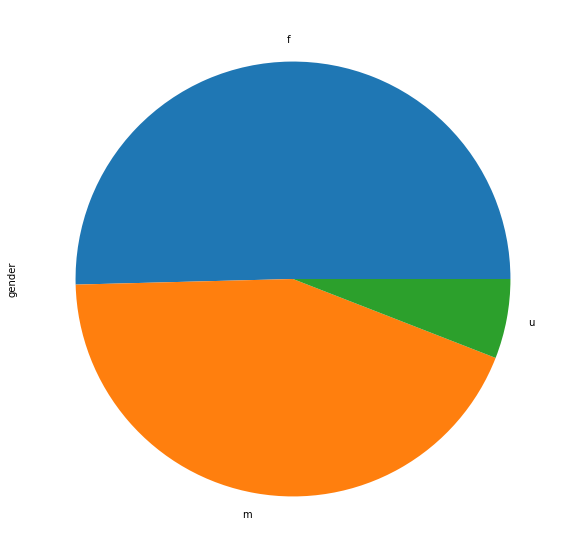

In [5]:
total_data.groupby('gender')['gender'].count().plot.pie(figsize=(10, 10))

# Age chart

<AxesSubplot:ylabel='age'>

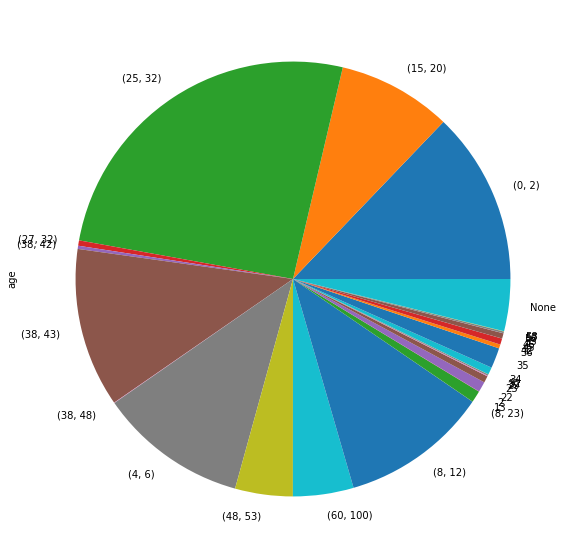

In [6]:
total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 10))

[+] Image path: ../input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399863183_a04f4c26a1_o.jpg
[+] Image shape: (600, 600, 3)
[!] Age: (25, 32) Gender: f


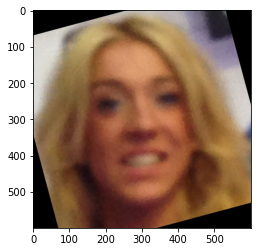

In [7]:
sample_num = 200
im_name = total_data.iloc[sample_num].original_image
im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
print('[+] Image path:', im_path)
image = cv2.imread(im_path)
print('[+] Image shape:', image.shape)
print('[!] Age:', total_data.iloc[sample_num].age, 'Gender:', total_data.iloc[sample_num].gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

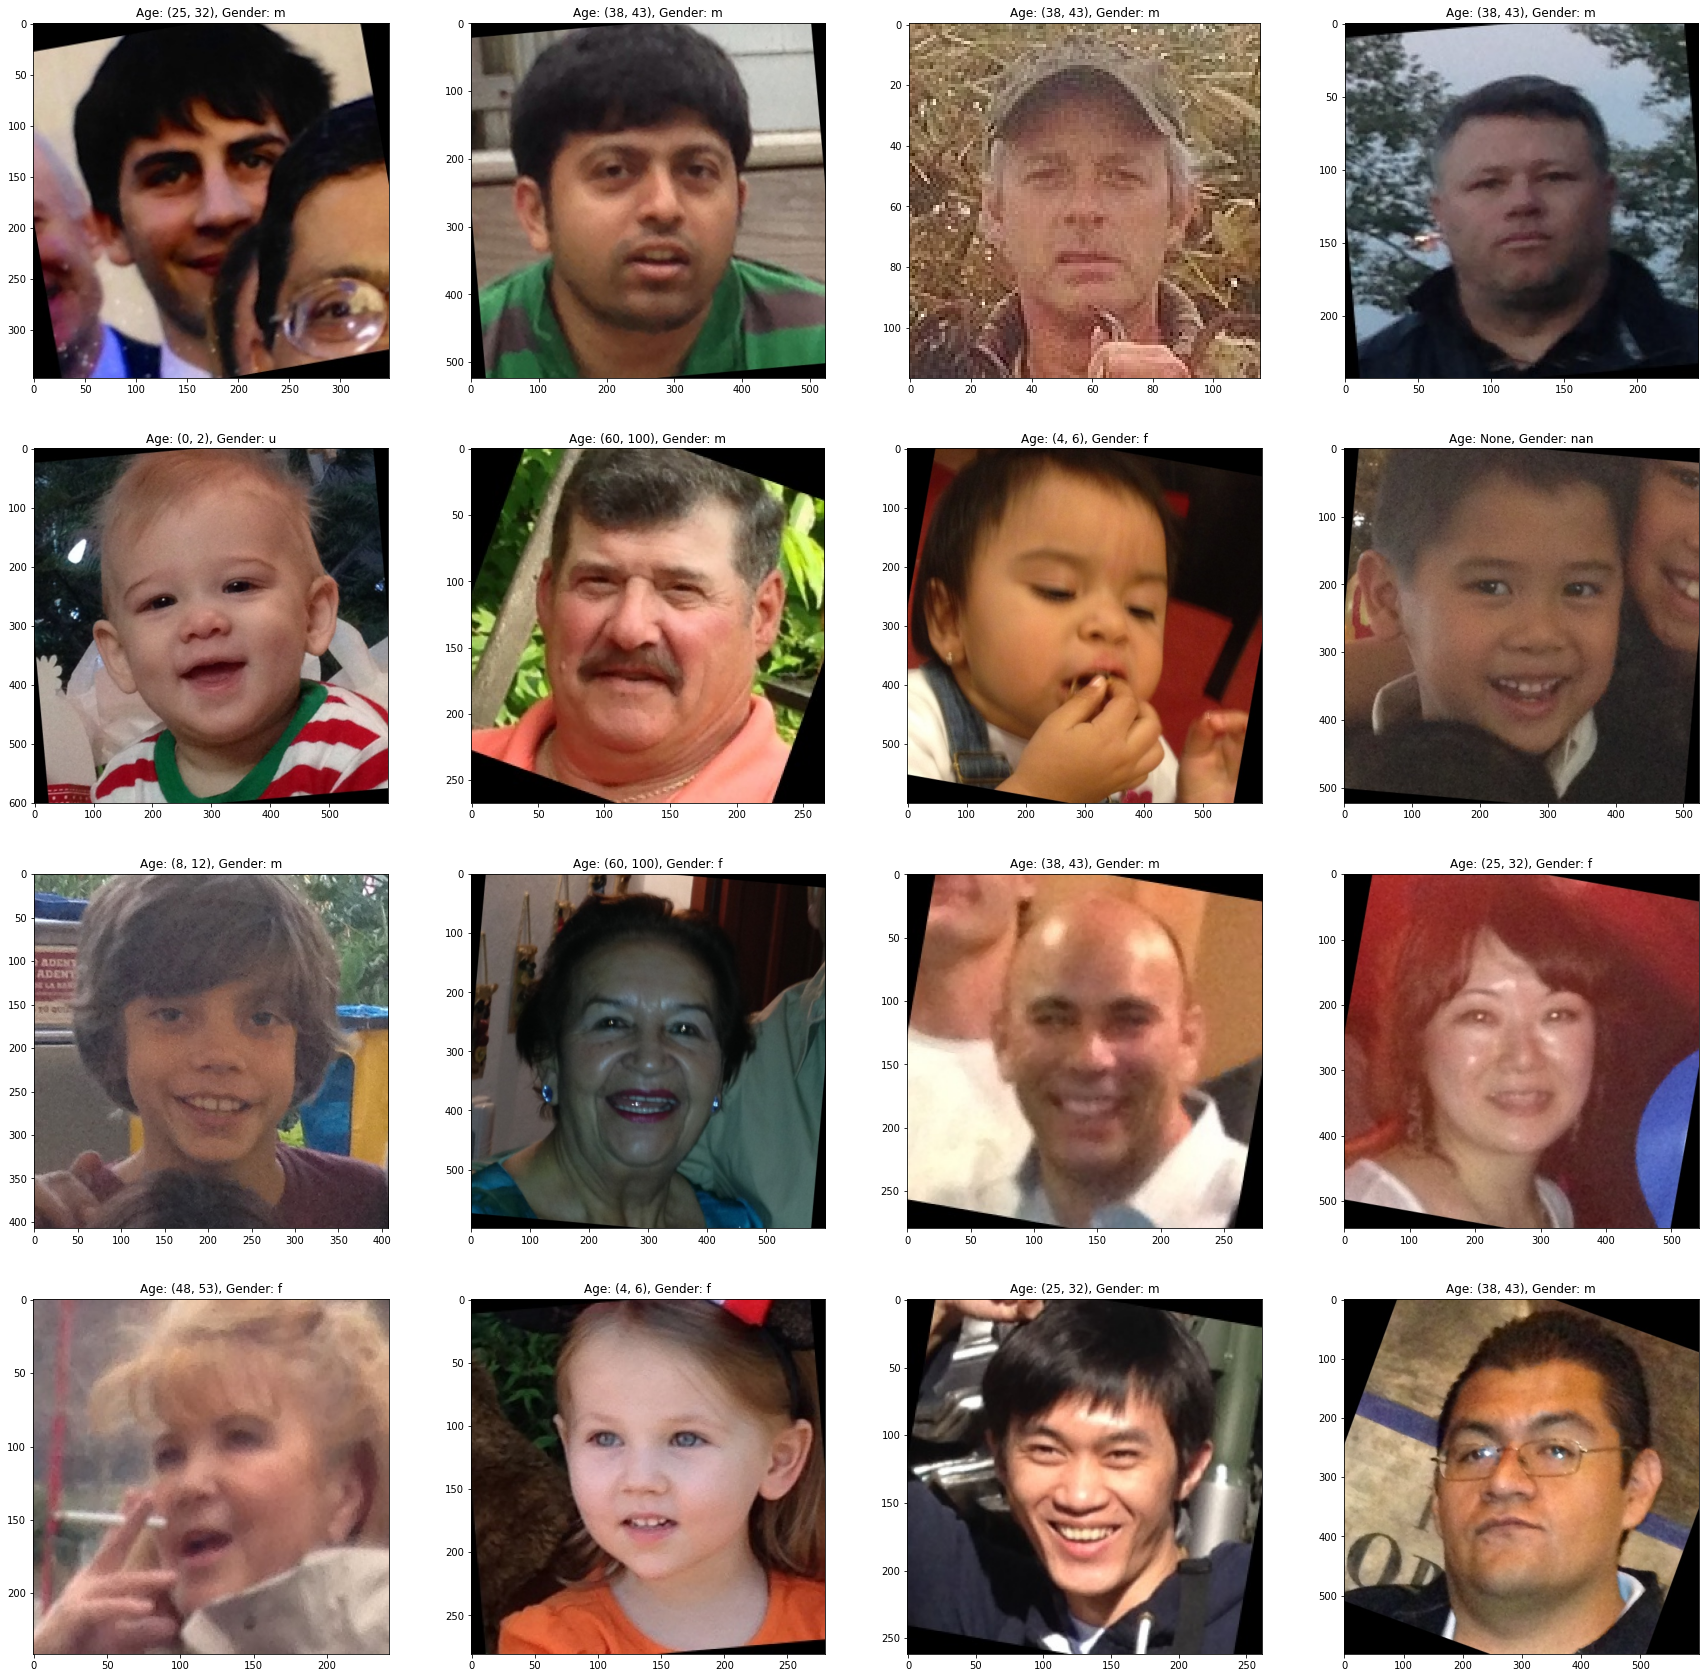

In [8]:
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(30,30))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

In [9]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []
for idx, each in enumerate(total_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        total_data.age.loc[idx] = age_mapping_dict[each]
total_data = total_data.drop(labels=drop_labels, axis=0) #droped None values
total_data.age.value_counts(dropna=False)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [10]:
total_data = total_data.dropna()
total_data['full_path'] = total_data.apply(lambda x: os.path.join(data_parent, 'faces', str(x.user_id), 'coarse_tilt_aligned_face.' + str(x.face_id) + '.' + x.original_image), axis=1)
total_data.age.unique(), len(total_data.age.unique()), total_data.gender.unique()

(array(['25-32', '38-43', '4-6', '60+', '15-20', '48-53', '8-13', '0-2'],
       dtype=object),
 8,
 array(['f', 'm', 'u'], dtype=object))

# change age and gender mapping 

In [11]:

gender_map = {'f':0, 
             'm':1,
             'u':2}
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
total_data.gender = total_data.gender.replace(gender_map)
total_data.age=total_data.age.replace(age_map)

In [12]:
gender_labels = total_data.gender.values.tolist()
age_labels= total_data.age.values.tolist()
train_paths = total_data.full_path.values.tolist()
len(gender_labels), gender_labels[0],len(age_labels),age_labels[0], train_paths[0]

(18551,
 0,
 18551,
 4,
 '../input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399646885_67c7d20df9_o.jpg')

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
shuffle_list = list(zip(train_paths, gender_labels,age_labels))
shuffle_list = random.sample(shuffle_list, len(train_paths))
train_paths, gender_labels,age_labels = zip(*shuffle_list)
age_labels = np.array(list(age_labels)).reshape((-1, 1))
enc= OneHotEncoder()
age_labels = enc.fit_transform(age_labels).toarray() 

In [15]:
train_split = 0.75
train_sample = int(train_split * len(total_data))

train_data = train_paths[:train_sample]
validation_data = train_paths[train_sample:]

train_labels_gender = gender_labels[:train_sample]
validation_labels_gender = gender_labels[train_sample:]

train_labels_age=age_labels[:train_sample]
validation_labels_age=age_labels[train_sample:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)
# print("validation data count:")
# len(validation_data), len(validation_labels)

train data count:


(13913, 13913, 13913)

In [16]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import multiprocessing

In [17]:
# train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender),list(train_labels_age)))
# validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data), list(validation_labels_gender),list(validation_labels_age)))
train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_age)))
validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_age)))

In [18]:
# for path, target1,target2 in train_dataset.take(1):
#     print(path, target1,target2)
for path, target1 in train_dataset.take(1):
    print(path, target1)

tf.Tensor(b'../input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/82152000@N00/coarse_tilt_aligned_face.727.11842760644_da742a3976_o.jpg', shape=(), dtype=string) tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


In [19]:
# def preprocess_func(path, label_gender,label_age):
#     image = tf.io.read_file(path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [128, 128]) / 255.0
        
#     return image, label_gender, label_age

def preprocess_func(path, label_age):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_age

In [20]:
import multiprocessing

In [21]:
train_batches = train_dataset.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_dataset.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)

(512, 128, 128, 3) (512, 8)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0.], shape=(8,), dtype=float64)


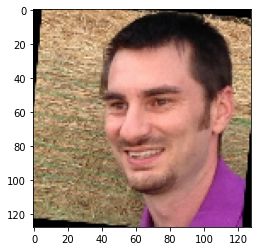

In [22]:
# for image, target1,target2 in train_batches.take(1):
#     print(image.shape, target1.shape,target2.shape)
#     image = tf.squeeze(image[0])
#     print(target1[0])
#     print(target2[0])
#     plt.imshow(image)
#     plt.show()
#     break

for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

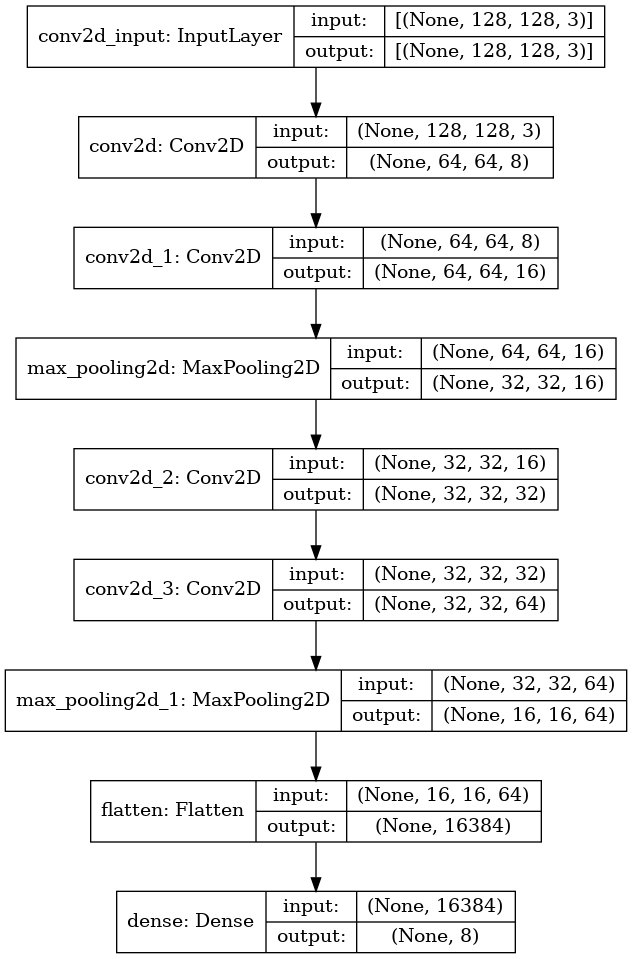

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Age classification (training with results)

In [25]:
 history = model.fit(train_batches, epochs=25, validation_data = validation_batches)

Epoch 1/25
28/28 [==============================] - 120s 4s/step - loss: 1.9660 - accuracy: 0.2531 - val_loss: 1.8036 - val_accuracy: 0.3174
Epoch 2/25
28/28 [==============================] - 3s 118ms/step - loss: 1.7237 - accuracy: 0.3641 - val_loss: 1.6481 - val_accuracy: 0.3745
Epoch 3/25
28/28 [==============================] - 3s 114ms/step - loss: 1.5939 - accuracy: 0.4133 - val_loss: 1.5396 - val_accuracy: 0.4204
Epoch 4/25
28/28 [==============================] - 3s 113ms/step - loss: 1.4755 - accuracy: 0.4515 - val_loss: 1.4707 - val_accuracy: 0.4418
Epoch 5/25
28/28 [==============================] - 3s 117ms/step - loss: 1.3869 - accuracy: 0.4865 - val_loss: 1.4088 - val_accuracy: 0.4748
Epoch 6/25
28/28 [==============================] - 4s 131ms/step - loss: 1.3141 - accuracy: 0.5129 - val_loss: 1.3652 - val_accuracy: 0.4881
Epoch 7/25
28/28 [==============================] - 3s 114ms/step - loss: 1.2469 - accuracy: 0.5399 - val_loss: 1.3368 - val_accuracy: 0.5009
Epoch 8

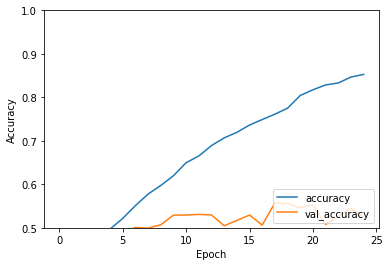

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

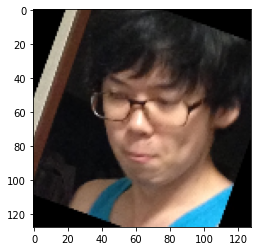

In [27]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [28]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

In [29]:
index = np.argmax(prediction)
decoding = {0:'0-2', 1:'4-6', 2:'8-13',3:'15-20',4:'25-32',5:'38-43',6:'48-53',7:'60+'}

print('[+] prediction is :', decoding[index]) 
# print(validation_data[7].age_labels)

[+] prediction is : 25-32


# gender classification with results

In [30]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender)))
validation_dataset2 = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_gender)))

In [31]:
for path, target1 in train_dataset2.take(1):
    print(path, target1)

tf.Tensor(b'../input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/82152000@N00/coarse_tilt_aligned_face.727.11842760644_da742a3976_o.jpg', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int32)


In [32]:
def preprocess_func(path, label_gender):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_gender

In [33]:
train_batches2 = train_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches2 = validation_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)

(512, 128, 128, 3) (512, 8)
tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0.], shape=(8,), dtype=float64)


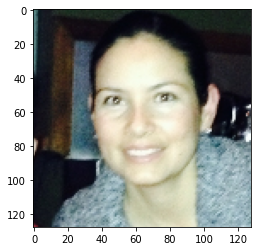

In [34]:
for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.4),
    
     tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(258, 3, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.5), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 8)         224       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)       

In [36]:
 history = model.fit(train_batches2, epochs=30, validation_data = validation_batches2)

Epoch 1/30
28/28 [==============================] - 35s 1s/step - loss: 0.0000e+00 - accuracy: 0.4334 - val_loss: 0.0000e+00 - val_accuracy: 0.4407
Epoch 2/30
28/28 [==============================] - 4s 128ms/step - loss: 0.0000e+00 - accuracy: 0.4334 - val_loss: 0.0000e+00 - val_accuracy: 0.4407
Epoch 3/30
28/28 [==============================] - 4s 129ms/step - loss: 0.0000e+00 - accuracy: 0.4334 - val_loss: 0.0000e+00 - val_accuracy: 0.4407
Epoch 4/30
28/28 [==============================] - 4s 126ms/step - loss: 0.0000e+00 - accuracy: 0.4334 - val_loss: 0.0000e+00 - val_accuracy: 0.4407
Epoch 5/30
28/28 [==============================] - 4s 126ms/step - loss: 0.0000e+00 - accuracy: 0.4334 - val_loss: 0.0000e+00 - val_accuracy: 0.4407
Epoch 6/30
28/28 [==============================] - 4s 127ms/step - loss: 0.0000e+00 - accuracy: 0.4334 - val_loss: 0.0000e+00 - val_accuracy: 0.4407
Epoch 7/30
28/28 [==============================] - 4s 126ms/step - loss: 0.0000e+00 - accuracy: 0.433

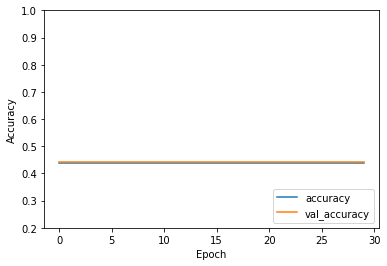

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

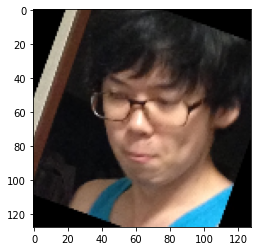

In [38]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [39]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

In [40]:
index = np.argmax(prediction)
decoding = {0:'f', 1:'m', 2:'u'}

print('[+] prediction is :', decoding[index]) 


[+] prediction is : f
